Applying Nadaraya-Watson to predict redshift from photometric parameters:

From http://astrostatistics.psu.edu/datasets/SDSS_quasar.html:

"" Most or all large galaxies have a massive black hole (MBH, 106-109 Mo solar masses) at the center. Gas from the interstellar medium or a disrupted star may fall onto the MBH through an accretion disk ("to accrete" means "to fall onto"). This accretion disk can become exceedingly hot and can eject a jet of material at relativistic (near the speed of light) velocities. The disk and jet radiate light across the electromagnetic spectrum (radio, infrared, visible, ultraviolet, X-ray, gamma-ray) with great efficiency. In most galaxies today, like our own Milky Way Galaxy, the MBH is starved of gas and little light is produced.  In other galaxies, like Seyfert galaxies or radio galaxies, the light is very strong, particularly in spectral bands other than the visible band where the stars of the host galaxies emit most of their light. In rare cases called quasars, the light from the accreting MBH exceeds the starlight in all spectral bands by enormous factors. These are the brightest objects in the Universe and can be seen even at high redshifts (i.e. great distance from us).

The spectrum, variability and (when resolved in telescopes) structure of quasars are studied in detail to understanding the complex processes of accreting MBHs and their environs.  But an important subfield studies consist of wide-field surveys for quasars and characterize their bulk properties such as brightness in various spectral bands, redshifts, and luminosities. Such survey and photometric (brightness) studies lead to classification of quasar subtypes (e.g. Type I, Type II, radio-loud/radio-quiet, BAL, BL Lacs, Lyman-alpha dropouts), to measurement of the quasar luminosity function (distribution of luminosities), and to cosmic evolution studies (how the population changes with redshift).

For many years, quasar surveys produced rather small samples of 101-103 objects. But the Sloan Digital Sky Survey (SDSS) (York et al. 2000) is performing a unique wide-field photometric and spectroscopic survey leading to a well-defined sample of 104 quasars with very precise photometric measurements in five visible bands and accurate redshifts.  Some of these also have radio, infrared and X-ray detections from other surveys.  The photometric properties from the first SDSS Data Release quasar catalog (Schneider et al. 2003) have been extensively discussed by Richards et al. (2002), Hall et al. (2002), Ivezic et al. (2002), Vignali et al. (2003), Reichard et al. (2003), Pindor et al. (2003), Richards et al. (2003), Pentericci et al. (2003), Zakamska et al. (2003), Wu et al. (2004), Fan et al. (2004), Hopkins et al. (2004), Weinstein et al. (2004), Richards et al. (2004), Collinge et al. (2005), Yip et al. (2005), Yahata et al. (2005), Zakamska et al. (2005), Chiu et al. (2005), Kitsionas et al. (2005), and Vanden Berk et al. (2005). The newer quasar catalog offered here is several times larger than the earlier one and has not yet been studied in detail.

[There] are two examples of multivariate relations that were found in the earlier dataset by Weinstein et al. (2004).  The first shows the nonlinear relationship between the (u_mag - g_mag) color index and redshift.  The second shows the non-Gaussian distribution of quasars in the (g_mag - r_mag) vs. (u_mag - g_mag) color-color plot.""

Dataset:
http://astrostatistics.psu.edu/datasets/SDSS_quasar.html

Applying Nadaraya-Watson regression as follows:

• Response Variable: Redshift (z)

• Predictor Variables:

    – the difference between brightness in the u (ultraviolet) band and that in the g (green) band (u_mag − g_mag)
    – the difference between brightness in the g (green) band and that in the r (red) band (g_mag − r_mag)
    – the difference between brightness in the i (more red) band and that in the z (even more red) band (i_mag − z_mag)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
#"local constant” type of regression for Nadaraya-Watson kernel regression

In [2]:
data = pd.read_fwf("~/Downloads/SDSS_quasar.txt")

In [28]:
data.head()

,SDSS_J,R.A.,Dec.,z,u_mag,sig_u,g_mag,sig_g,r_mag,sig_r,...,sig_z,Radio,X-ray,J_mag,sig_J,H_mag,sig_H,K_mag,sig_K,M_i
0,000009.26+151754.5,0.038605,15.298476,1.1986,19.921,0.042,19.811,0.036,19.386,0.017,...,0.069,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-25.085
1,000009.38+135618.4,0.039088,13.938447,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,...,0.033,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-27.419
2,000009.42-102751.9,0.039269,-10.464428,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,...,0.047,0.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-26.459
3,000011.41+145545.6,0.047547,14.929353,0.4596,19.637,0.030,19.466,0.024,19.362,0.022,...,0.047,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-22.728
4,000011.96+000225.3,0.049842,0.040372,0.4790,18.237,0.028,17.971,0.020,18.025,0.019,...,0.029,0.0,-1.66,16.651,0.136,15.82,0.149,14.821,0.111,-24.046


In [4]:
Y = data.z
Y

0        1.1986
1        2.2400
2        1.8442
3        0.4596
4        0.4790
          ...  
46415    0.2977
46416    0.3585
46417    2.3826
46418    2.0382
46419    1.2845
Name: z, Length: 46420, dtype: float64

In [5]:
u_g_diff = data.u_mag - data.g_mag
g_r_diff = data.g_mag - data.r_mag
i_z_diff = data.i_mag - data.z_mag

In [6]:
#3 predictor variables
pred_var = {'u_g_diff': u_g_diff,'g_r_diff': g_r_diff,'i_z_diff': i_z_diff}
X = pd.DataFrame(data=pred_var)
X

,u_g_diff,g_r_diff,i_z_diff
0,0.110,0.425,-0.158
1,0.325,0.448,0.221
2,0.220,0.049,0.040
3,0.171,0.104,0.188
4,0.266,-0.054,0.045
...,...,...,...
46415,0.128,0.298,0.405
46416,0.233,0.381,0.467
46417,0.583,0.210,0.208
46418,0.252,0.210,0.112


In [7]:
#split training/testing set
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123) 
train_x

,u_g_diff,g_r_diff,i_z_diff
11528,0.362,0.284,0.038
3158,0.076,0.094,-0.038
4617,0.567,-0.071,0.292
16363,0.075,0.067,0.246
14517,0.269,0.300,0.084
...,...,...,...
7763,0.594,-0.030,0.271
15377,0.070,0.337,0.080
17730,0.207,0.077,0.009
28030,-0.010,0.231,0.190


In [17]:
#define nadaraya-watson function for finding estimators
def ndw_ep_kern(train_x,train_y,x0,h):
    
    denom = []
    num = []
    for i in np.arange(0,len(train_x),1):
        Xi = np.array(train_x)[i]
        diff = Xi-x0
        norm = np.linalg.norm(diff)
        norm_bdw = norm/h
        #Epanechnikov kernel
        if abs(norm_bdw)<1:
            kern_i = (3/4) * (1-norm) 
        else:
            kern_i = 0
        #kern_i=((1/np.sqrt(2*np.pi))*np.exp(-0.5*norm_bdw**2))
        kern_i_Y=(np.array(train_y)[i])
        num_i = kern_i * kern_i_Y
        denom.append(kern_i)
        num.append(num_i)
    num_sum = np.sum(num)
    denom_sum = np.sum(denom)
    if denom_sum == 0:
        estimator = 0
    else: 
        estimator = num_sum/denom_sum
    return estimator

In [18]:
#define function for performing cross-validation for nadaraya-watson
def ndw_cv(X,Y,h):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)
    train_x2, validation_x, train_y2, validation_y = train_test_split(train_x, train_y, test_size=0.0625, random_state=123)
    se = []
    
    for i in range(len(np.array(validation_x))):
        x=np.array(validation_x)[i]
        estimators = ndw_ep_kern(train_x2,train_y2,x,h)
        sq_error = (validation_y.iloc[i] - estimators)**2
        se.append(sq_error)
    return (np.mean(se)) 


In [19]:
#calc cross-validation errors for different bandwidths
h = [0.1,0.25,0.5,0.8,1]
mse_vals = []
for i in h:
    mse_vals.append([i, ndw_cv(X,Y,i)])
cv_errors = pd.DataFrame(data=mse_vals, columns=["bandwidth", "CV_ERROR_MSE"])


In [20]:
#cross-validation errors
cv_errors

,bandwidth,CV_ERROR_MSE
0,0.10,0.404729
1,0.25,0.280310
2,0.50,0.316422
3,0.80,0.335543
4,1.00,0.340173


Text(0, 0.5, 'Cross Validation Error')

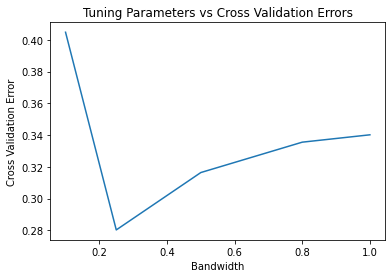

In [25]:
#plot bandwidth vs cv error
plt.plot(cv_errors.bandwidth, cv_errors.CV_ERROR_MSE)
plt.title('Tuning Parameters vs Cross Validation Errors')
plt.xlabel('Bandwidth')
plt.ylabel('Cross Validation Error')

In [21]:
#apply nadaraya-watson with tuned bandwidth
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)
h= 0.25
se = []
    
for i in range(len(np.array(test_x))):
    x=np.array(test_x)[i]
    estimator = ndw_ep_kern(train_x,train_y,x,h)
    sq_error = (test_y.iloc[i] - estimator)**2
    se.append(sq_error)
    
#mean squared error over all predictions for the test set
np.mean(se)

0.2901354875187936

In [27]:
#squared errors of each prediction for the test set
se

[0.5527408941839584,
 0.13962857344920754,
 0.0959548416605837,
 0.8141735326160099,
 0.00367200755828519,
 1.3419741918122422e-06,
 0.0790851265715516,
 0.6415915609759748,
 0.5410673632227215,
 0.06174152976250511,
 0.019766334456621515,
 3.172603603277651,
 0.08455212514736234,
 0.10082692899897407,
 0.00014712175519230933,
 0.058187339794448345,
 0.16381364814548985,
 0.8731779532803076,
 0.3895686553546936,
 0.1861190450425689,
 0.17370111883936784,
 0.7133734055627815,
 0.18487242496700287,
 0.049039648130671916,
 0.38825325909830477,
 0.4041255277876214,
 0.5650667214118342,
 0.4144178070175775,
 0.02997882481792626,
 0.06240692652589981,
 0.04413995419752983,
 5.656389913132699e-05,
 0.5738122118691926,
 0.7634120568142276,
 0.193118839791249,
 0.05368797615031085,
 0.10738232857857952,
 1.5553857501568123e-05,
 0.7208552929784908,
 0.1857083292528805,
 0.11798186052894125,
 8.70464183205371e-05,
 0.0005058359505646928,
 0.6495971975140841,
 0.031873679741623244,
 0.00864304110